In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import os
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
from skimage import transform
import matplotlib.pyplot as plt
import cv2

In [2]:
img_width, img_height = 150, 150
PATH = os.path.join(os.path.dirname("D:\\machine_learning_and _iot\\COVID19"), 'COVID19')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'val')

In [3]:
nb_train_samples = 500
nb_validation_samples = 500
epochs = 10
batch_size = 10

In [4]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 3021 images belonging to 2 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 22 images belonging to 2 classes.


In [10]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Epoch 1/10
50/50 [==============================] - 50s 1s/step - loss: 0.7463 - accuracy: 0.6548 - val_loss: 0.3761 - val_accuracy: 0.7970
Epoch 2/10
50/50 [==============================] - 41s 823ms/step - loss: 0.5096 - accuracy: 0.8310 - val_loss: 0.1359 - val_accuracy: 1.0000
Epoch 3/10
50/50 [==============================] - 36s 720ms/step - loss: 0.3318 - accuracy: 0.8820 - val_loss: 0.0025 - val_accuracy: 0.9066
Epoch 4/10
50/50 [==============================] - 39s 777ms/step - loss: 0.2419 - accuracy: 0.9310 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 5/10
50/50 [==============================] - 34s 682ms/step - loss: 0.2954 - accuracy: 0.9120 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 6/10
50/50 [==============================] - 34s 676ms/step - loss: 0.2682 - accuracy: 0.9310 - val_loss: 0.2585 - val_accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 33s 650ms/step - loss: 0.1881 - accuracy: 0.9410 - val_loss: 0.0226 - val_accuracy: 1.0000
E

In [11]:
model.save('Corona.h5')

In [17]:
def load(filename):
    np_image = Image.open(filename) #Open the image
    np_image = np.array(np_image).astype('float32')/255 #Creates a numpy array as float and divides by 255.
    np_image = transform.resize(np_image, (150, 150, 3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

In [63]:
def predict():
    #label_map = (test_it.class_indices)
    #print (label_map)

    image_to_predict = load("D:\\machine_learning_and _iot\\COVID19\\val\\COVID19\\covid_pat_1.jpeg")
    result = model.predict(image_to_predict)
    result= np.around(result,decimals=3)
    result=result*100
   
    m=[i for i in result]
    print("CORONA    Normal")
    print(result)        
    img=plt.imread("D:\\machine_learning_and _iot\\COVID19\\val\\COVID19\\covid_pat_1.jpeg")
    plt.imshow(img)
        

CORONA    Normal
[[100.   0.]]


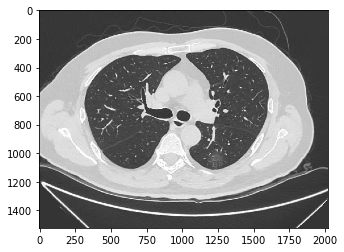

In [64]:
if __name__=="__main__":
               predict()